# chapter3

In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
x = iris.data[:,[2, 3]]
y = iris.target

In [2]:
print("class lables : ", np.unique(y))

class lables :  [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

In [4]:
print('lable counts in y :', np.bincount(y))
print('lable counts in y_train :', np.bincount(y_train))
print('lable counts in y_test :', np.bincount(y_test))

lable counts in y : [50 50 50]
lable counts in y_train : [35 35 35]
lable counts in y_test : [15 15 15]


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [6]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.01, random_state=1)
ppn.fit(x_train_std, y_train)

Perceptron(eta0=0.01, random_state=1)

In [7]:
y_pred = ppn.predict(x_test_std)
print("misclassified : %d " % (y_test != y_pred).sum())

misclassified : 2 


In [8]:
from sklearn.metrics import accuracy_score
print("accuracy : %.3f" %accuracy_score(y_test, y_pred))

accuracy : 0.956


In [9]:
print('Accuracy: %.3f' % ppn.score(x_test_std, y_test))

Accuracy: 0.956


In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plot
import matplotlib as plt
def plot_decision_regions(x, y, classifier , resolution = 0.02, test_idx = None):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = x[:,0].min()-1, x[:,0].max()+1
    x2_min, x2_max = x[:,1].min()-1, x[:,1].max()+1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plot.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plot.xlim(xx1.min(), xx1.max())
    plot.ylim(xx2.min(), xx2.max())
    for idx, cl, in enumerate(np.unique(y)):
        plot.scatter(x = x[y == cl, 0],
                     y = x[y == cl, 1],
                     alpha=0.8,
                     c = colors[idx],
                     marker=markers[idx],
                     label=f'class {cl}',
                     edgecolors='black')
    if test_idx:
        x_test, y_test = x[test_idx,:], y[test_idx]
        plot.scatter(x_test[:,0], x_test[:,1], c='none',edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')

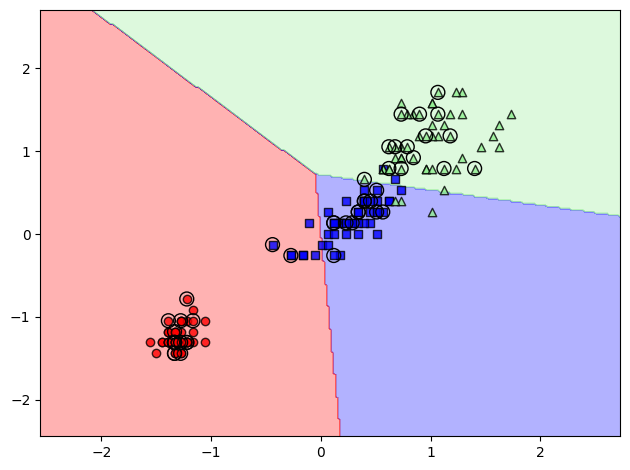

In [11]:
x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(x=x_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plot.tight_layout()
plot.show()

# logistic regression

In [12]:
class LogisticRegressionGD :
    def __init__(self, eta = 0.01, n_iter = 40, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0])
            self.losses_.append(loss)
        return self
    
    def net_input(self, x):
        return np.dot(x, self.w_) + self.b_
    
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


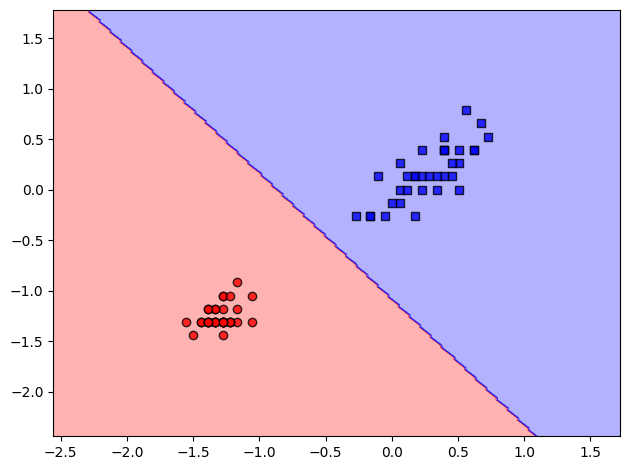

In [13]:
x_train_subset = x_train_std[(y_train == 0) | (y_train == 1)]
y_train_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.3, n_iter=100, random_state=1)
lrgd.fit(X=x_train_subset, y=y_train_subset)
plot_decision_regions(x=x_train_subset, y=y_train_subset, classifier=lrgd)
plot.tight_layout()
plot.show() 

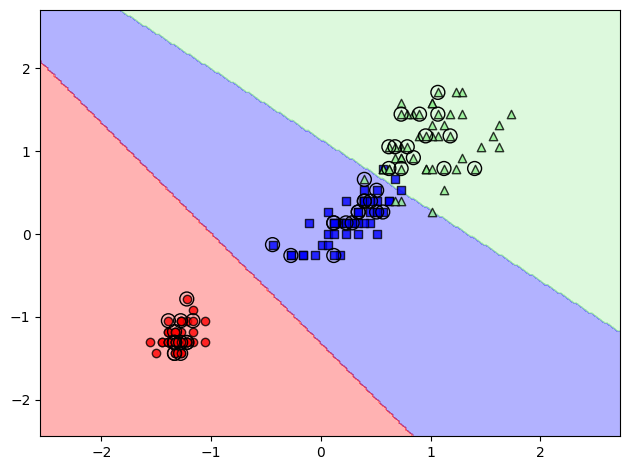

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_std, y_train)
plot_decision_regions(x_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plot.tight_layout()
plot.show()

In [15]:
lr.predict_proba(x_test_std[:3, :])


array([[4.78759951e-05, 5.94605151e-02, 9.40491609e-01],
       [9.08871423e-01, 9.11043443e-02, 2.42331514e-05],
       [9.49632640e-01, 5.03607612e-02, 6.59884302e-06]])

In [16]:
lr.predict_proba(x_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [17]:
lr.predict(x_test_std[:3, :])

array([2, 0, 0])

In [18]:
lr.predict(x_test_std[0, :].reshape(1, -1))

array([2])

# SVM
minimizing the margin ---- 
models with small margins are more prone to overfitting

how greater c is overfitting is closer

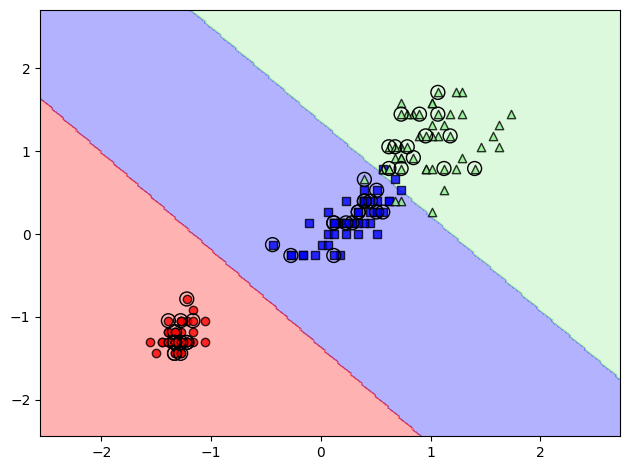

In [19]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state= 1)
svm.fit(x_train_std, y_train)
plot_decision_regions(x_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plot.tight_layout()
plot.show()

In [20]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

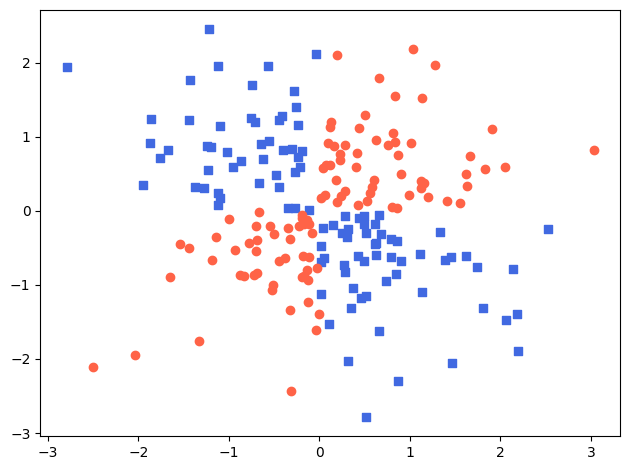

In [21]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
x_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(x_xor[:,0] > 0, x_xor[:,1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(x_xor[y_xor == 1, 0], x_xor[y_xor == 1, 1],
            c="royalblue", marker='s')
plt.scatter(x_xor[y_xor == 0, 0], x_xor[y_xor == 0, 1],
            c="tomato", marker='o')
plt.tight_layout()
plt.show()

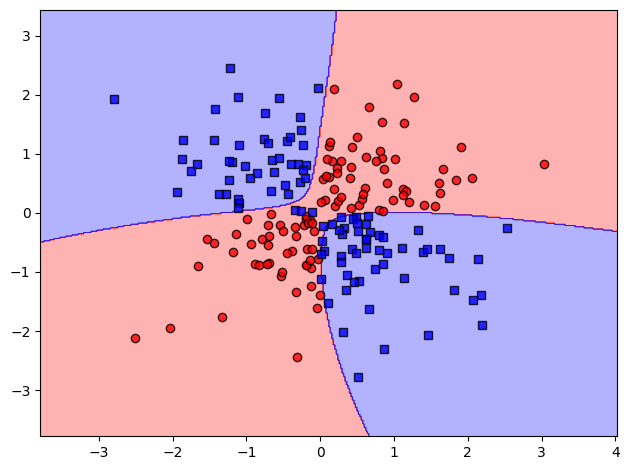

In [22]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.20, C=20.0)
svm.fit(x_xor, y_xor)
plot_decision_regions(x_xor, y_xor, classifier=svm)
plt.tight_layout()
plt.show()

gamma is the landa and how greater it is tighter boundaries are 

# decisionTree

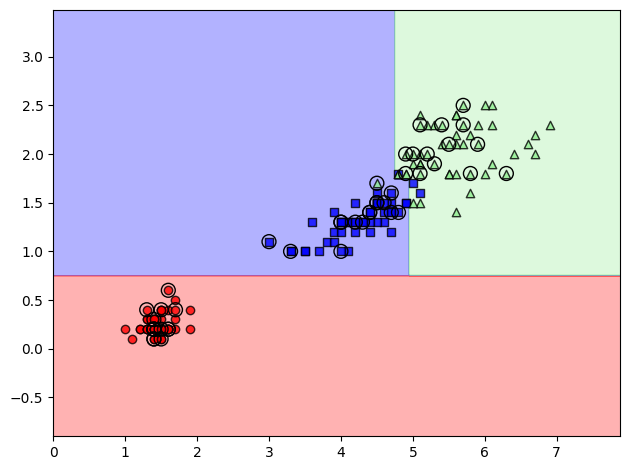

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
# criterion : gini , error,  entropy
tree_model.fit(x_train, y_train)
x_combined = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(x_combined, y_combined, classifier=tree_model, test_idx=range(105, 150))
plt.tight_layout()
plt.show()

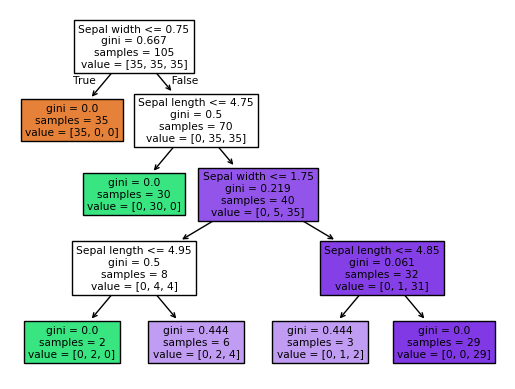

In [24]:
from sklearn import tree
feature_names = ['Sepal length', 'Sepal width','Petal length', 'Petal width']
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)
plt.show()

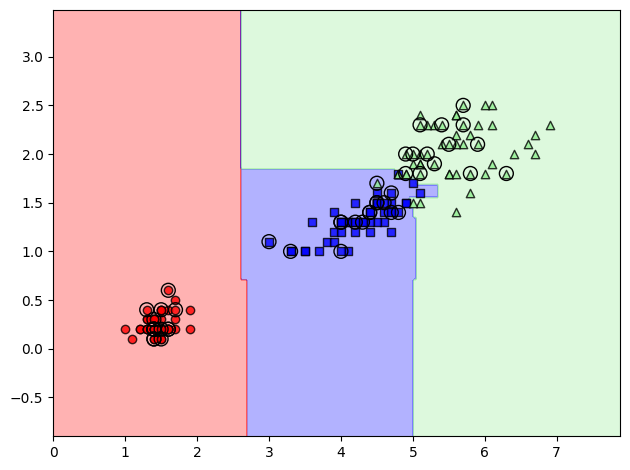

In [25]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)
forest.fit(x_train, y_train)
plot_decision_regions(x_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.tight_layout()
plt.show()

# KNN

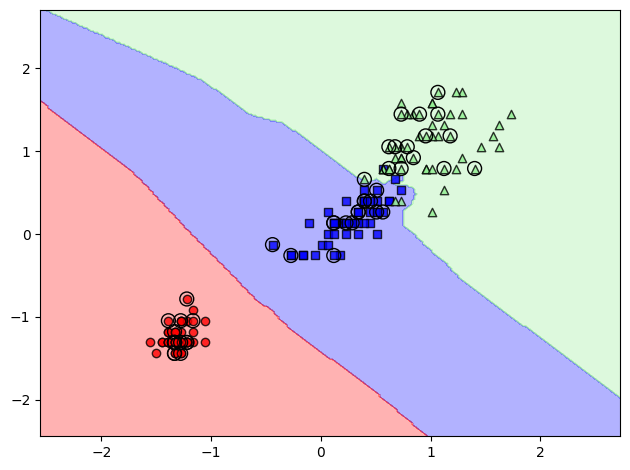

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train_std, y_train)
plot_decision_regions(x_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.tight_layout()
plt.show()